In [1]:
import numpy as np
import pandas as pd
from scipy.stats import linregress
from plotnine import *
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
warnings.simplefilter('ignore') # suppress plotnine warnings

# Loading Data and Basic Setup

In [2]:
DATA_PATH = os.path.join(".", "data")

def load_data(filename, data_path=DATA_PATH):
    file_path = os.path.join(data_path, filename)
    return pd.read_csv(file_path)

jet_df = load_data("deposition.csv")

jet_df.sort_values(by=['V_j', 'U_w'])

,V_j,U_w,Re_j,Re_w,UV_Ratio,VU_Ratio,Lh,Lh_d
6,2.5,10.0,44.6875,178.7500,4.000000,0.250000,0.00157,2.415385
5,3.0,12.0,53.6250,214.5000,4.000000,0.250000,0.00186,2.861538
8,5.0,20.0,89.3750,357.5000,4.000000,0.250000,0.00300,4.615385
4,5.0,24.0,89.3750,429.0000,4.800000,0.208333,0.00230,3.538462
3,5.0,50.0,89.3750,893.7500,10.000000,0.100000,0.00095,1.461538
17,10.0,20.0,178.7500,357.5000,2.000000,0.500000,0.01990,30.615385
16,10.0,25.0,178.7500,446.8750,2.500000,0.400000,0.01300,20.000000
15,10.0,30.0,178.7500,536.2500,3.000000,0.333333,0.00951,14.630769
14,10.0,35.0,178.7500,625.6250,3.500000,0.285714,0.00740,11.384615
9,10.0,40.0,178.7500,715.0000,4.000000,0.250000,0.00562,8.646154


In [3]:
jet_df["UV_Ratio"].value_counts()

4.000000     10
3.000000      3
3.500000      2
5.000000      2
5.333333      1
4.800000      1
2.000000      1
2.500000      1
10.000000     1
Name: UV_Ratio, dtype: int64

In [4]:
jet_df["Re_j"].value_counts()

178.7500    6
357.5000    3
89.3750     3
446.8750    2
303.8750    2
268.1250    2
536.2500    2
44.6875     1
53.6250     1
Name: Re_j, dtype: int64

In [5]:
def reg_plot(x_name, y_name, main_title, fltr='VU_Ratio', df=jet_df):
    X = np.array((df[x_name]))
    Y = np.array((df[y_name]))
    b, a, r_value, p_value, std_err = linregress(X, Y) 
    eqn = f'y={a:.2f}+({b:.2f}x), $R^2=${r_value**2:.2f}'
    
    return (ggplot(df)
     + aes(x=x_name, y=y_name)
     + geom_point(aes(color=fltr))
     + stat_smooth(color=None, method='lm')
     + labs(title=main_title + '\n\n' + eqn)
    )

# For fixed $U_w/V_j$, $Lh/d$ scales with $Re_j$:

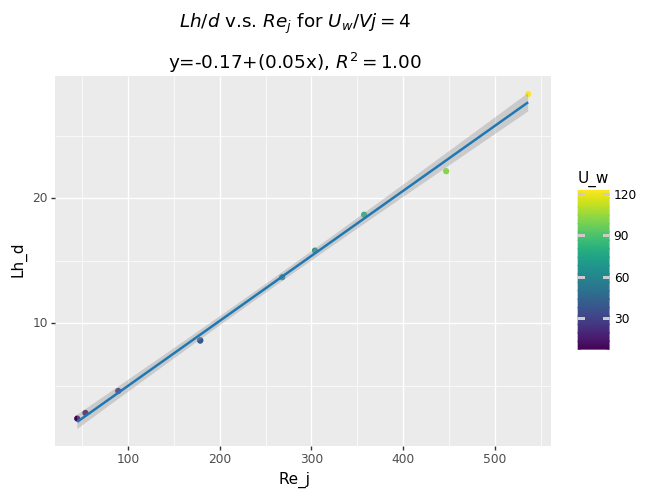

<ggplot: (-9223372036559495971)>

In [6]:
reg_plot('Re_j', 'Lh_d', "$Lh/d$ v.s. $Re_j$ for $U_w/Vj=4$", fltr="U_w", df=jet_df[jet_df["UV_Ratio"]==4])

# For fixed $Re_j$, $Lh/d$ roughly scales with $V_j/U_w$:

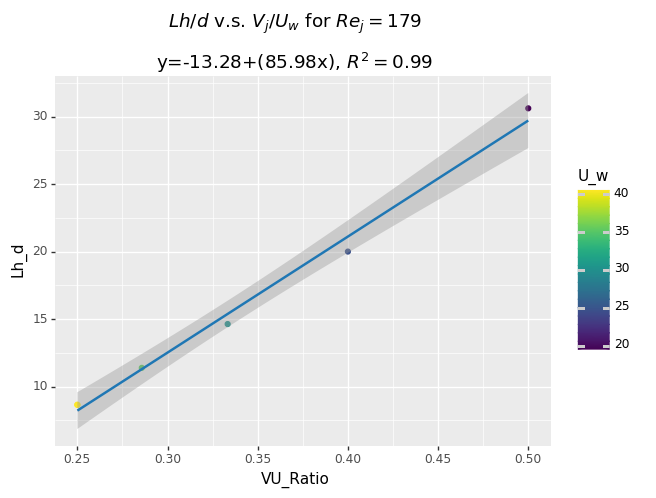

<ggplot: (-9223372036557247863)>

In [7]:
reg_plot('VU_Ratio', 'Lh_d', "$Lh/d$ v.s. $V_j/U_w$ for $Re_j=179$", fltr="U_w", df=jet_df[jet_df["V_j"]==10])

# All Data Scaling with $Re_j\cdot(V_j/U_w)$

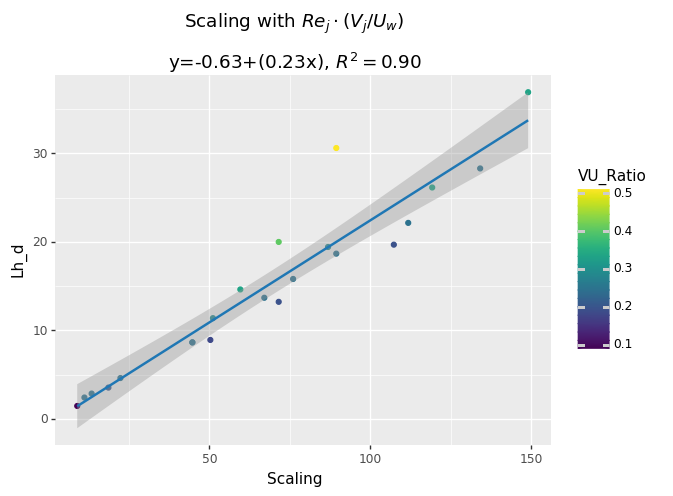

<ggplot: (297549495)>

In [8]:
jet_df["Scaling"] = jet_df['Re_j']**2/jet_df['Re_w']
reg_plot('Scaling', 'Lh_d', "Scaling with $Re_j\cdot (V_j/U_w)$")

## Exclude the point with $U_w/V_j$ = 2 :
The scaling works reasonably well!

Note that when $U_w/V_j$ = 2, a vortex is showing us and a bump at the left of the impingement point appears, so it is already a different case than the normal deposition.

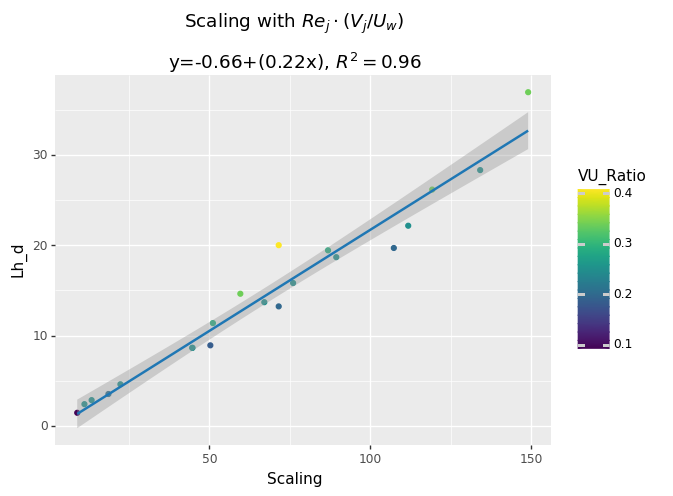

<ggplot: (297986245)>

In [9]:
reg_plot('Scaling', 'Lh_d', "Scaling with $Re_j\cdot (V_j/U_w)$", df=jet_df[jet_df["UV_Ratio"]>2])

# All Data Scaling with $Re_j \cdot \alpha(V_j/U_w)$
## $\alpha_1(V_j/U_w)$: using the exact theoretical prediction
$$\alpha_1(V_j/U_w) = \frac{1}{A}\cdot \left[\frac{1}{4{\Gamma^2}}\right] = \frac{U_w/V_j - 1/3}{16} \cdot \left[\frac{1}{4{[(U_w/V_j+1)/3-1]^2}} \right] = \frac{U_w/V_j - 1/3}{64[(U_w/V_j+1)/3-1]^2}$$

The scaling doesn't work very well, espicially with the cases with $U_w/V_j < 3$.

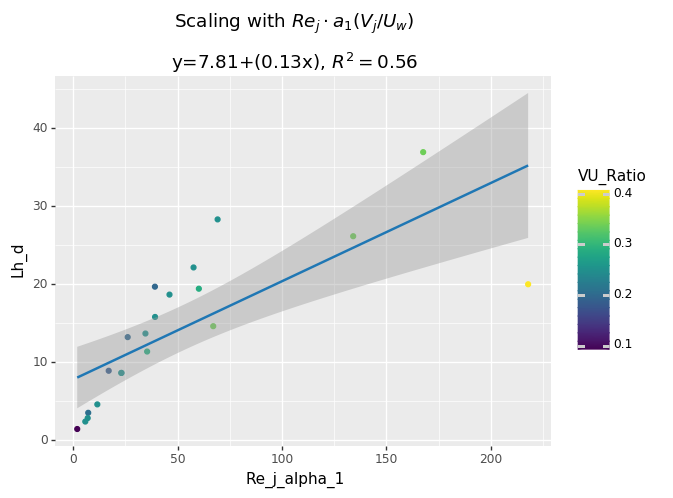

<ggplot: (-9223372036556429487)>

In [10]:
jet_df["Re_j_alpha_1"] = jet_df['Re_j'] * (jet_df["UV_Ratio"]-1/3)/64/((jet_df["UV_Ratio"]+1)/3-1)**2
reg_plot('Re_j_alpha_1', 'Lh_d', "Scaling with $Re_j\cdot a_1(V_j/U_w)$", df=jet_df[jet_df["UV_Ratio"]>2])

### Excluding the points with $U_w/V_j \le 3$, our prediction is very good.
Note that the asymmetric pressure distribution and vortex structure on the left starts to appear when $U_w/V_j = 3$, so I think some of our assumption does not apply very well for those cases.

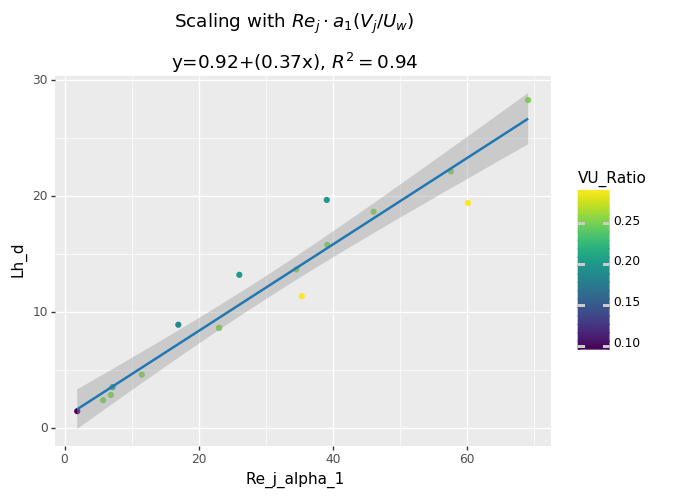

<ggplot: (-9223372036556199785)>

In [11]:
jet_df["Re_j_alpha_1"] = jet_df['Re_j'] * (jet_df["UV_Ratio"]-1/3)/64/((jet_df["UV_Ratio"]+1)/3-1)**2
reg_plot('Re_j_alpha_1', 'Lh_d', "Scaling with $Re_j\cdot a_1(V_j/U_w)$", df=jet_df[jet_df["UV_Ratio"]>3])

## $\alpha_2(V_j/U_w)$: Scale up Gamma by 1.5
Flow conservation equation gives
$$h = \Gamma \delta, ~~where~~~ \Gamma = (U_w/V_j + 1)(1-C_1)$$
Now just change $\Gamma$ to 
$$\Gamma = 1.5*(U_w/V_j + 1)(1-C_1)$$
Then we obtain a new $\alpha$:
$$\alpha_2(V_j/U_w) = \frac{U_w/V_j - 1/3}{64[(U_w/V_j+1)/3*1.5-1]^2}$$

Scales very well even including the case of $U_w/V_j=2$.

It seems like we fail to capture some important feature in the flow conservation equation for the low $U_w/V_j$ ratios...

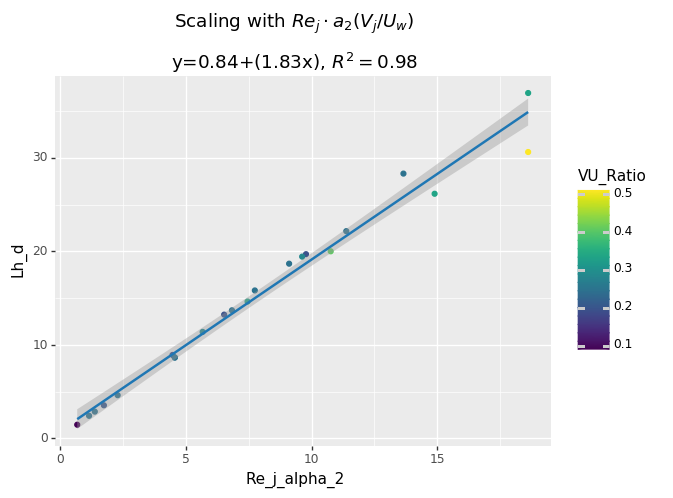

<ggplot: (298869936)>

In [12]:
jet_df["Re_j_alpha_2"] = jet_df['Re_j'] * (jet_df["UV_Ratio"]-1/3)/64/((jet_df["UV_Ratio"]+1)/3*1.5-1)**2
reg_plot('Re_j_alpha_2', 'Lh_d', "Scaling with $Re_j\cdot a_2(V_j/U_w)$", df=jet_df)

## $\alpha_3(V_j/U_w)$: Correcting the B.C. at Heel

$$\alpha_3(V_j/U_w) = \frac{1}{A}\cdot \left[\frac{1}{4{\Gamma^2}} -\delta_0^2\right]  = \frac{U_w/V_j - 1/3}{16} \cdot \left[\frac{1}{4{[(U_w/V_j+1)/3-1]^2}} -\delta_0^2\right]    $$

Note that this still breaks if $U_w/V_j \le 2$. 

The scaling actually becomes worse with this modification.

Without modifying the flow conservation equation directly, the theory will break when $U_w/V_j \le 2$.

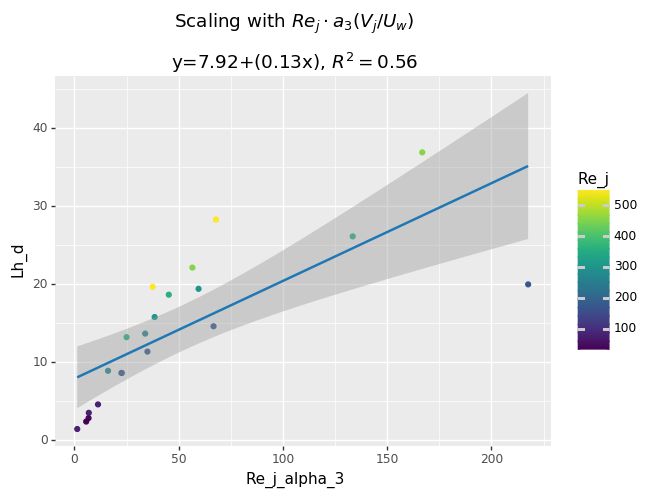

<ggplot: (-9223372036556155511)>

In [13]:
delta0 = 0.1
jet_df["Re_j_alpha_3"] = jet_df['Re_j'] * (jet_df["UV_Ratio"]-1/3)/16* (1/4/((jet_df["UV_Ratio"]+1)/3-1)**2 - delta0**2)
reg_plot('Re_j_alpha_3', 'Lh_d', "Scaling with $Re_j\cdot a_3(V_j/U_w)$", fltr="Re_j", df=jet_df[jet_df["UV_Ratio"]>2])

# Impingement Outcomes


In [22]:
unsteady = load_data("unsteady.csv")
jet_df["Status"] = "Deposition"
full_df = pd.concat([jet_df, unsteady])
full_df = full_df.dropna(axis=1)

In [52]:
unsteady

,V_j,U_w,Re_j,Re_w,UV_Ratio,VU_Ratio,Status
0,5,5.0,89.375,89.3750,1.000000,1.000000,Ripples
1,5,7.5,89.375,134.0625,1.500000,0.666667,Ripples
2,10,10.0,178.750,178.7500,1.000000,1.000000,Ripples
3,5,75.0,89.375,1340.6250,15.000000,0.066667,Splash
4,5,100.0,89.375,1787.5000,20.000000,0.050000,Splash
5,15,110.0,268.125,1966.2500,7.333333,0.136364,Splash
6,30,180.0,536.250,3217.5000,6.000000,0.166667,Splash
7,30,210.0,536.250,3753.7500,7.000000,0.142857,Splash
8,60,240.0,1072.500,4290.0000,4.000000,0.250000,Splash
9,40,160.0,715.000,2860.0000,4.000000,0.250000,Splash


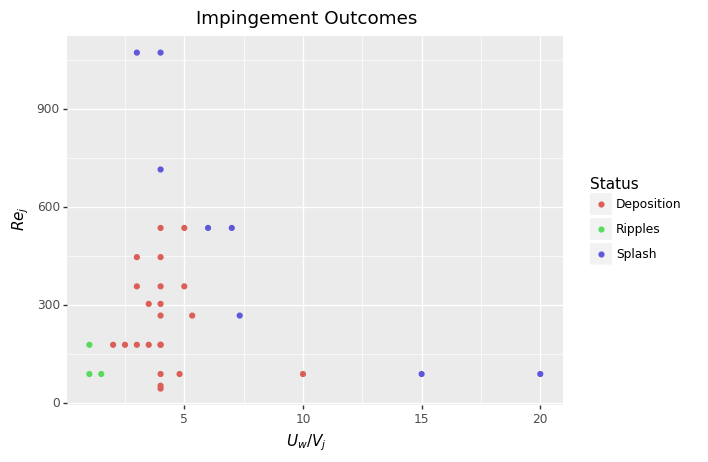

<ggplot: (299274781)>

In [49]:
(ggplot(full_df)
     + aes(x="UV_Ratio", y="Re_j")
     + geom_point(aes(color="Status"))
     + labs(title="Impingement Outcomes", x="$U_w/V_j$", y="$Re_j$")
)